In [95]:
from datetime import datetime
import pandas as pd
from crvusdsim.network.subgraph import get_user_snapshots
from curvesim.network.utils import sync
from src.configs import LLAMMA_WSTETH
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib import gridspec
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({"font.size": 10})
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

get_user_snapshots = sync(get_user_snapshots)

In [127]:
float_cols = [
    "collateral",
    "depositedCollateral",
    "collateralUp",
    "loss",
    "lossPct",
    "debt",
    "health",
]
int_cols = ["n", "n1", "n2", "timestamp"]
str_cols = ["id", "user"]


def json_to_df(content):
    df = pd.DataFrame(content)
    df["user"] = df["user"].apply(lambda x: x["id"])

    for col in float_cols:
        df[col] = df[col].astype(float)

    for col in int_cols:
        df[col] = df[col].astype(int)

    # Don't include negligible positions
    df = df[df["collateral"] > 0]
    df = df[df["debt"] > 1]  # some positions have dust
    df = df[df["health"] > 0]  # filter out unhealthy positions
    df["collateral_log"] = np.log(df["collateral"])
    df["debt_log"] = np.log(df["debt"])
    df = df.dropna(axis=1)
    df = df.set_index("id")
    return df

In [119]:
# TODO Let's sample Q4 of 2023
first = int(datetime(2023, 10, 1).timestamp())
last = int(datetime(2024, 1, 1).timestamp())

ts = first

snapshots = []
while ts <= last:
    snapshots.append(json_to_df(get_user_snapshots(LLAMMA_WSTETH, end_ts=ts)))
    ts += 60 * 60 * 24

df = pd.concat(snapshots)
df

,user,collateral,depositedCollateral,collateralUp,loss,lossPct,stablecoin,n,n1,n2,debt,health,timestamp
id,,,,,,,,,,,,,
0x37417b2238aa52d0dd2d6252d989e728e8f706e4-1696089600-0xff05bd3180bc8e38f7aea981fe2af57f277bd9df,0xff05bd3180bc8e38f7aea981fe2af57f277bd9df,1.190680,1.199174,1.190680,0.008494,0.708339,0,4,69,72,1110.846628,0.033859,1696089851
0x37417b2238aa52d0dd2d6252d989e728e8f706e4-1696089600-0xfde66fb9f020de05531534eae35c3785d75ad59c,0xfde66fb9f020de05531534eae35c3785d75ad59c,7.805002,7.805002,7.805002,0.000000,0.000000,0,4,71,74,7137.306973,0.033783,1696089851
0x37417b2238aa52d0dd2d6252d989e728e8f706e4-1696089600-0xfd81b27d9796a1ba7d7171ea70010c9befb2a62a,0xfd81b27d9796a1ba7d7171ea70010c9befb2a62a,127.251573,127.251573,127.251573,0.000000,0.000000,0,10,74,83,108602.582700,0.043226,1696089851
0x37417b2238aa52d0dd2d6252d989e728e8f706e4-1696089600-0xfccc0f1d9a3373aa031c7883ec8aca1e1dd35f3a,0xfccc0f1d9a3373aa031c7883ec8aca1e1dd35f3a,14.000000,14.152796,14.000000,0.152796,1.079616,0,4,64,67,13722.482649,0.034760,1696089851
0x37417b2238aa52d0dd2d6252d989e728e8f706e4-1696089600-0xfcba7b991c337e78f5f36d5b37f229630d9cacd4,0xfcba7b991c337e78f5f36d5b37f229630d9cacd4,17.997159,20.049146,17.997159,2.051987,10.234784,0,4,10,13,29547.439346,0.062726,1696089851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x37417b2238aa52d0dd2d6252d989e728e8f706e4-1704052800-0x029db8f5bc790bae2148d314e7d21de24e67f1c7,0x029db8f5bc790bae2148d314e7d21de24e67f1c7,9.510740,15.409212,9.510740,5.898472,38.278870,0,4,85,88,7697.301510,0.042429,1704055379
0x37417b2238aa52d0dd2d6252d989e728e8f706e4-1704052800-0x029373585fd188d8ec3af3b0efe1ea9528033e57,0x029373585fd188d8ec3af3b0efe1ea9528033e57,8.110200,8.110200,8.110200,0.000000,0.000000,0,4,106,109,5312.316450,0.042936,1704055379
0x37417b2238aa52d0dd2d6252d989e728e8f706e4-1704052800-0x0274f85465beb6e31ccb3587ec0cc132ca3f4d6f,0x0274f85465beb6e31ccb3587ec0cc132ca3f4d6f,32.402229,36.366529,32.402229,3.964300,10.900958,0,4,-15,-12,72255.082267,0.033613,1704055379


In [130]:
def remove_spines_and_ticks(_ax, skip=[], keep_x_ticks=False, keep_y_ticks=False):
    # Remove spines and ticks from ax_histx
    for spine in _ax.spines.values():
        if spine.spine_type in skip:
            continue
        spine.set_visible(False)
    if not keep_x_ticks:
        _ax.set_xticks([])
    if not keep_y_ticks:
        _ax.set_yticks([])
    _ax.set_xticklabels([])
    _ax.set_yticklabels([])
    return _ax

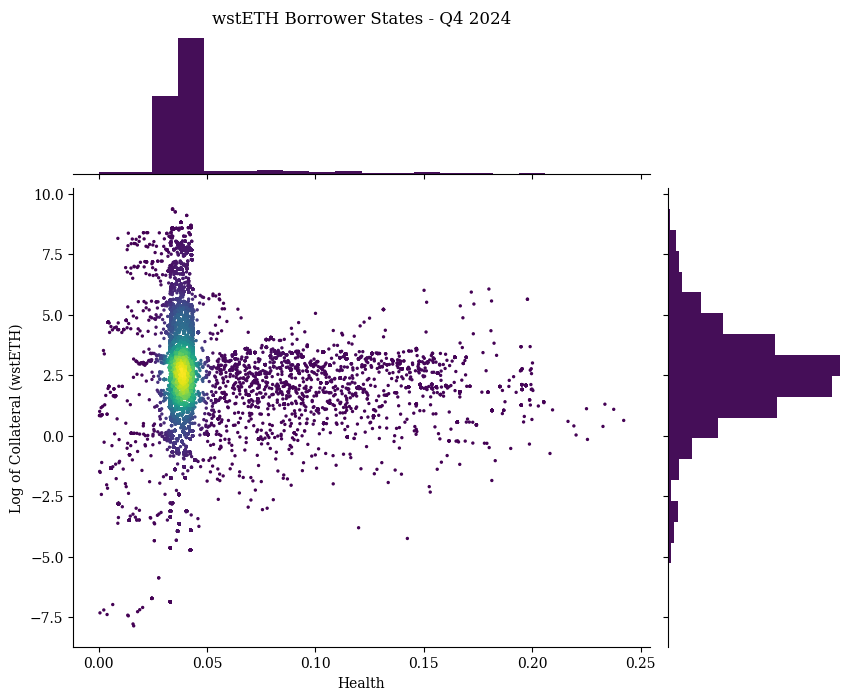

In [131]:
values = df[["health", "collateral_log"]].values.T

kde = stats.gaussian_kde(values)
density = kde(values)

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(4, 4, wspace=0.1, hspace=0.1)

ax = fig.add_subplot(gs[1:4, 0:3])
x, y = values
ax.scatter(x, y, c=density, s=2)
# Setting the labels
ax.set_xlabel("Health")
ax.set_ylabel("Log of Collateral (wstETH)")

# Histogram/PDF for X-axis (Health)
ax_histx = fig.add_subplot(gs[0, 0:3])
ax_histx.hist(df["health"], bins=20, density=True, color="#450e58")
ax_histx = remove_spines_and_ticks(ax_histx, skip=["bottom"], keep_x_ticks=True)

# Histogram/PDF for Y-axis (Collateral Log)
ax_histy = fig.add_subplot(gs[1:4, 3])
ax_histy.hist(
    df["collateral_log"],
    bins=20,
    density=True,
    orientation="horizontal",
    color="#450e58",
)
ax_histy = remove_spines_and_ticks(ax_histy, skip=["left"], keep_y_ticks=True)
ax_histx.set_title("wstETH Borrower States - Q4 2024")

# Adding a title
plt.show()

<Axes: >

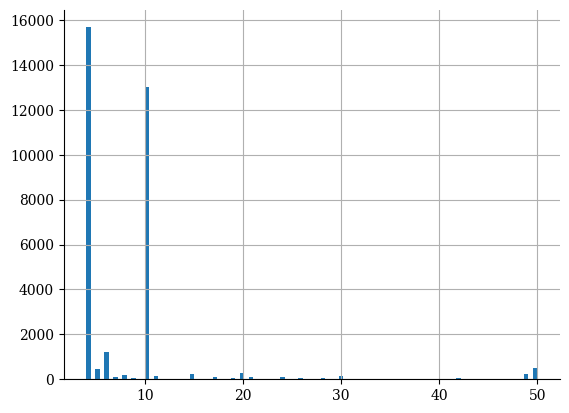

In [132]:
df["n"].hist(bins=100)

In [133]:
import plotly.express as px

values = df[["health", "collateral_log", "n"]].values.T

kde = stats.gaussian_kde(values)
density = kde(values)

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=df["health"],
            y=df["collateral_log"],
            z=df["n"],
            mode="markers",
            marker=dict(
                size=2,
                color=density,  # set color to an array/list of desired values
                colorscale="Viridis",  # choose a colorscale
                opacity=0.1,
            ),
        )
    ]
)

fig.update_layout(
    title=f"Borrower Stats for wstETH",
    xaxis_title="Health",
    yaxis_title="Log Collateral",
    # zaxis_title="N",
    height=500,
    showlegend=False,
)

fig.show()

# Randomly Sample Positions from KDE

In [135]:
values = df[["health", "collateral", "n"]].values.T

kde = stats.gaussian_kde(values)
density = kde(values)

num_samples = 10_000

sampled_values = kde.resample(num_samples)

sampled_df = pd.DataFrame(sampled_values.T, columns=["health", "collateral", "n"])
sampled_df

,debt,collateral,n
0,0.038996,-74.572438,3.712514
1,0.049933,14.518371,4.326040
2,0.042054,230.009199,8.889004
3,0.036994,-148.958115,1.745110
4,0.038328,-67.549241,5.527625
...,...,...,...
9995,0.038142,1746.421382,11.404270
9996,0.108372,-47.267211,5.225621
9997,0.032573,-84.273005,11.803446
9998,0.040246,105.486132,10.683945


In [136]:
from src.sim.scenario import Scenario

scenario = Scenario("baseline_macro", ["wsteth"])
controller = scenario.controllers[0]

[INFO][17:52:37][src.sim.scenario]-55181: Fetching wsteth market from subgraph
[INFO][17:52:40][src.sim.scenario]-55181: Market snapshot as 2024-01-10 17:02:11
[INFO][17:52:40][src.sim.scenario]-55181: Bands snapshot as 2024-01-09 19:03:23
[INFO][17:52:40][src.sim.scenario]-55181: Users snapshot as 2024-01-10 15:11:11
[INFO][17:52:48][src.sim.scenario]-55181: Using 245600 1Inch quotes from 2023-11-19 19:00:00 to 2023-12-19 19:00:00
[INFO][17:52:48][src.utils.poolgraph]-55181: Found 20 valid trading cycles of length 3.


In [ ]:
user = sampled_df.iloc[0]
controller.health_calculator("0xfoo", user["debt"], user["collateral"], user[""])

In [ ]:
# from scipy.optimize import minimize_scalar

# def obj(debt, health, collateral, n):
#     return abs(controller.health_calculator("0xfoo", debt, collateral, n) - health)

# minimize_scalar(obj,